# Section 2.5 — Continuous random variables

This notebook contains all the code examples from [Section 2.5 Continuous random variables](https://minireference.com/static/excerpts/noBSstats/noBSstats_ch02_PROB.pdf#page=132) of the **No Bullshit Guide to Statistics**.

Topics covered in this notebook:
- Definitions of continuous random variables
- Examples of random variables
- Probability calculations
- Computer models for random variables 
  - Overview of `scipy.stats` methods
- Real-world example to demo probability applications
- Discussion
  - Bulk and tails of a the normal distribution


#### Notebook setup

We'll start by importing the Python modules we'll need for this notebook.

In [1]:
# load Python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)
%config InlineBackend.figure_format = 'retina'


In [1]:
%pip install ministats


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ministats import plot_pdf_and_cdf

In [4]:
# set random seed for repeatability
np.random.seed(3)

## Definitions


### Random variables

- *random variable* $X$:
  a quantity that can take on different values.
- **outcome**: a particular value $\{X = x\}$ or range of values $\{a \leq X \leq b\}$ that can occur as a result of observing the random variable $X$.
- **sample space** $\mathcal{X}$: describes the set of all possible outcomes of the random variable.
- $f_X$: the *probability distribution function*
  is a function that assigns probabilities to the different outcome in the sample space of a random variable.
  The probability distribution function of the random variable $X$
  is a function of the form $f_X: \mathcal{X} \to \mathbb{R}$.
- $F_X$:
  the *cumulative distribution function* (CDF) tells us the probability of an outcome
  less than or equal to a given value: $F_X(b) = Pr(\{ X \leq b \})$.
- $F_X^{-1}$:
  the inverse cumulative distribution function computes contains the information
  about the quantiles of the probability distribution.
  The value $F_X^{-1}(q)=x_q$ tells how far you need to go in the sample space
  so that the event $\{ X \leq x_q \}$ contains a proportion $q$ of the total probability:
  $\Pr(\{ X \leq x_q \})=q$.
- $\mathbb{E}_X[w]$:
  the *expected value* of the function $w(X)$
  computes the average value of $w(X)$ computed for all the possible values of the random variable $X$.





#### Example 1: Uniform distribution

The [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) $\mathcal{U}(0,1)$ is described by the following probability density function:

$$
  p_U(u) =
  \begin{cases}
      1 & \mathrm{for}\ 0 \le u \le 1, \\
      0 & \mathrm{for}\ u<0\ \mathrm{or}\ u>1.
  \end{cases}
$$

where $U$ is the name of the random variable and $u$ are particular values it can take on.

The above equation describes tells you how likely it is to observe $\{U=u\}$.
For a uniform distribution $\mathcal{U}(0,1)$, each $u$ between 0 and 1 is equally likely to occur,
and values of $u$ outside this range have zero probability of occurring.

**Computer simulation**

- The continuous uniform family of distribution $\mathcal{U}(\alpha,\beta)$,
  which assigns equal probabilities to all outcomes in the interval $[\alpha,\beta]$.
  To create a computer model for a continuous uniform distribution,
  use the code `uniform(alpha,beta)`,
  where `alpha` and `beta` are two floats.


We'll introduce computer models for random variables is [Section 2.1.5 — Computer models for random variables](#computer_models) below, but since we're looking at a notebook, we can show a little preview of the calculations you'll learn by the end of the section.

In [5]:
# define the computer model `rvU` for the random variable U
from scipy.stats import uniform
rvU = uniform(0, 1)

# use `quad` function to integrate rvU.pdf between 0.2 and 0.5
from scipy.integrate import quad
quad(rvU.pdf, 0.2, 0.5)[0]

0.3

#### Example 2: Normal distribution

A random variable $N$ with a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 
$\mathcal{N}(\mu,\sigma)$ is described by the probability density function:

$$ 
 f_N(n) = \tfrac{1}{\sigma\sqrt{2\pi}} e^{\small -\tfrac{(n-\mu)^2}{2\sigma^2}}.
$$

The mean $\mu$ (the Greek letter *mu*) and the standard deviation $\sigma$ (the Greek letter *sigma*) are called the parameters of the distribution.

The math notation $\mathcal{N}(\mu, \sigma)$ is used to describe the whole family of normal probability distributions,
and $N \sim \mathcal{N}(1000, 100)$ is a particular instance of the distribution with mean $\mu = 1000$ and standard deviation $\sigma = 100$.

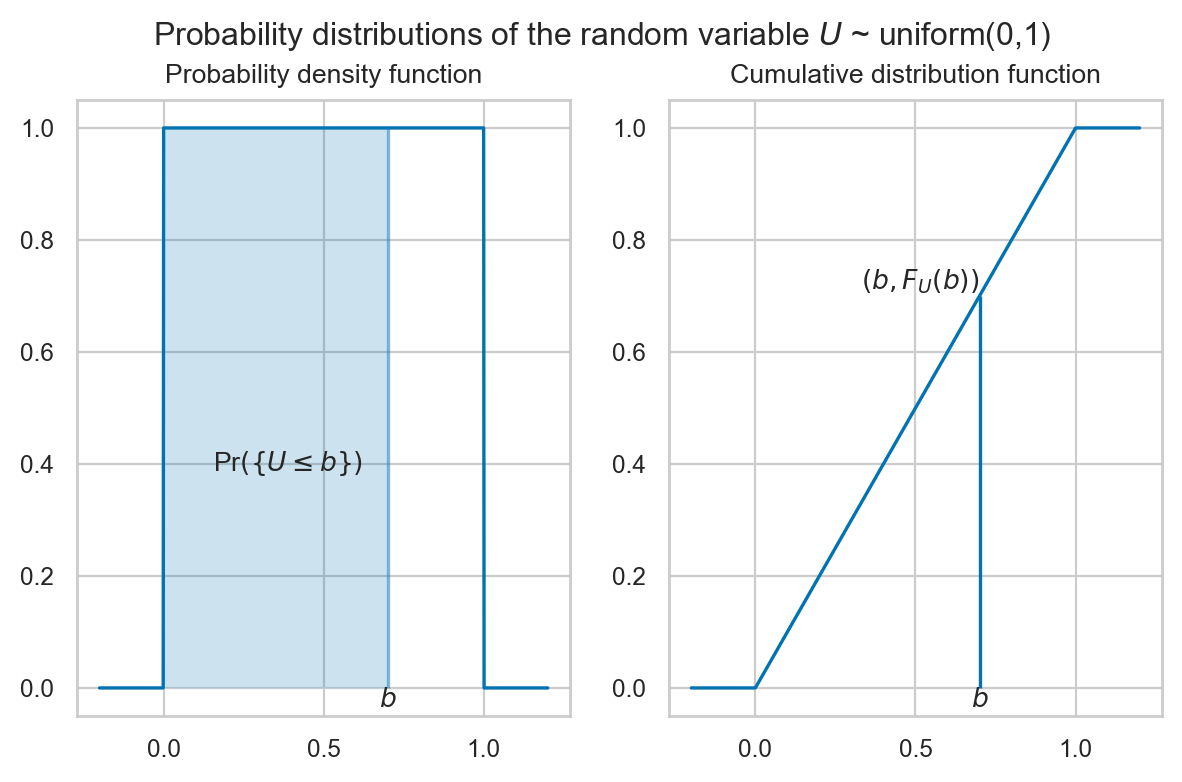

In [6]:
plot_pdf_and_cdf(rvU, b=0.7, xlims=[-0.2,1.2], rv_name="U", title="auto");

The code example below shows the calculation of the probability $\Pr\!\left( \{ 800 \leq N \leq 900 \} \right)$,
which corresponds to the integral $\int_{n=800}^{n=900} f_N(n) dn$.

In [7]:
# define the computer model `rvN` for the random variable N
from scipy.stats import norm
mean = 1000
std = 100
rvN = norm(mean, std)

# use `quad` function to integrate rvN.pdf between 800 and 900
quad(rvN.pdf, 800, 900)[0]

0.13590512198327784

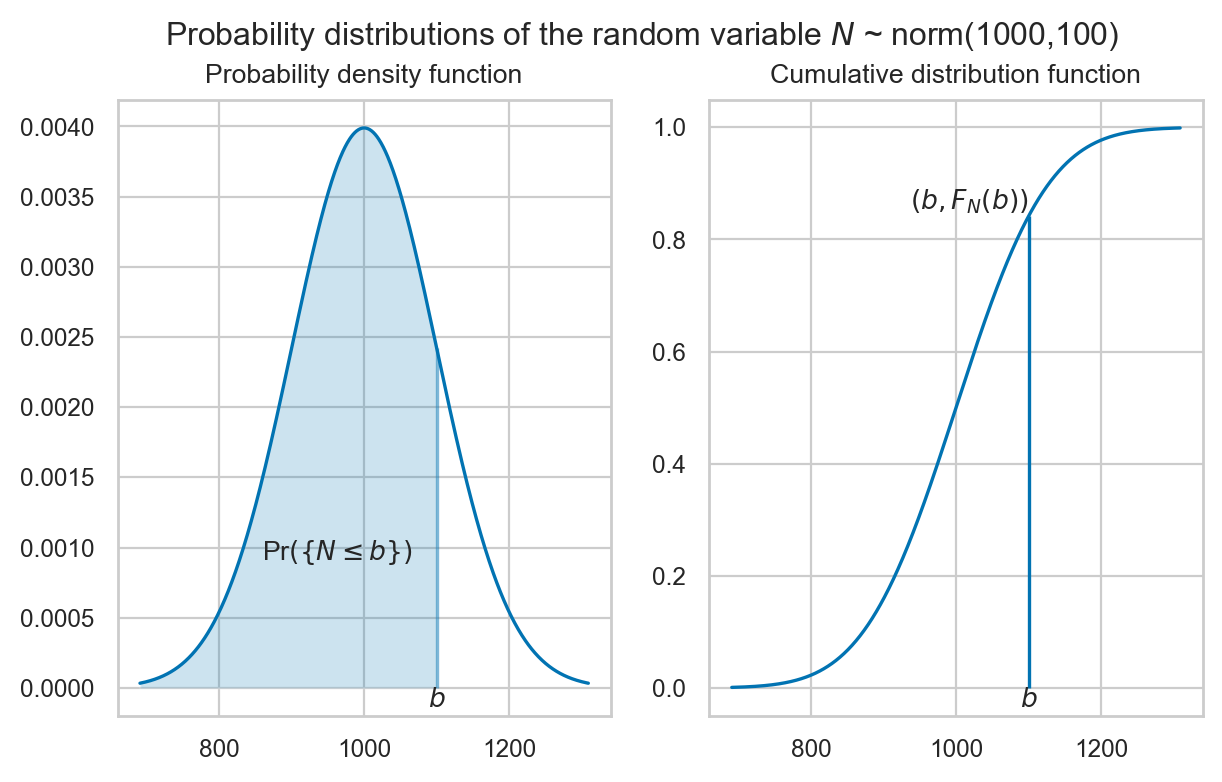

In [8]:
plot_pdf_and_cdf(rvN, b=1100, rv_name="N", title="auto");

## Calculations with random variables

### Example 1: mean and variance of the uniform distribution


#### Mean
\begin{align*}
    \mu_U = \mathbb{E}_U[U] 
        &=	\int_{-\infty}^{\infty}	u f_U(u) \; du		\\
        &=	\int_0^1 u f_U(u) \; du				\\
        &=	\int_0^1 u \cdot 1 \; du	= 	\tfrac{1}{2}.
\end{align*}

In [9]:
from sympy import symbols, integrate

u = symbols('u')
integrate(u * 1, (u,0,1))

1/2

So the mean is $\mu_U = \frac{1}{2} = 0.5$.

#### Variance

The formula for the variance is

$$
    \sigma_U^2
        = \mathbb{E}_U\!\left[ (U-\mu_U)^2 \right]
        = \int_0^1 (u- \tfrac{1}{2})^2 \cdot f_U(u) \; du.
$$

In [10]:
from sympy import symbols, integrate

u = symbols('u')
integrate( (u-1/2)**2 * 1, (u,0,1) )

0.0833333333333333

So the variance of $U$ is $\sigma_U^2 = \frac{1}{12} = 0.08\overline{3}$.

We can compute the standard deviation $\sigma_U$ by taking the square root of the variance.

In [11]:
import numpy as np
np.sqrt(0.0833333333333333)

0.2886751345948128

### Example 2: mean and variance of a normal distribution

$$
    p_N(n)
      = \tfrac{1}{\sigma\sqrt{2\pi}} e^{-\tfrac{(n-\mu)^2}{2\sigma^2}}
      = \tfrac{1}{100\sqrt{2\pi}} e^{-\tfrac{(n-1000)^2}{2\cdot100^2}}.
$$

In [12]:
import numpy as np

mu = 1000
sigma = 100

def fN(n):
    z = (n - mu)/sigma
    C = sigma * np.sqrt(2*np.pi)
    return 1 / C * np.exp(-1/2 * z**2)

The mean of $N$ is

In [13]:
from scipy.integrate import quad

def n_times_fN(n):
    return n * fN(n)

muN = quad(n_times_fN, 0, 3000)[0]
muN

1000.0000000000002

The standard deviation of $N$ is

In [14]:
def n_minus_mu_sq_times_fN(n):
    return (n-muN)**2 * fN(n)

sigma_sq = quad(n_minus_mu_sq_times_fN, 0, 2000)[0]
sigmaN = np.sqrt(sigma_sq)
sigmaN

100.0

### Skewness and kurtosis

In [15]:
from scipy.stats import norm

mu = 0     # position of the centre
sigma = 1  # dispersion
rvZ = norm(mu, sigma)

In [16]:
mean, var, skew, kurt = rvZ.stats(moments="mvsk")
mean, var, skew, kurt

(0.0, 1.0, 0.0, 0.0)

<a name="computer_models"></a>

## Computer models for random variables

- `<model>`: the family of probability distributions
- `<params>`: parameters of the model—specific value of the control knobs we choose in the general family of distributions to create a particular distribution
- `<model>(<params>)`: a particular instance of probability model created by choosing a model family `<model>` and the model parameters `<params>`.
  - example 1: uniform family of distribution $\mathcal{U}(\alpha,\beta)$ with parameters $\alpha$ and $\beta$.  
  - example 2: normal family of distribution $\mathcal{N}(\mu,\sigma)$ with parameters $\mu$ and $\sigma$.
- $\sim$: math shorthand symbol that stands for "is distributed according to."
  For example $X \sim \texttt{model}(\theta)$ means the random variable $X$
  is distributed according to model instance $\texttt{model}$ and parameters $\theta$.


In [17]:
from scipy.stats import norm

# create a normal random variable with mean 1000 and std 100
rvN = norm(1000, 100)

In [18]:
type(rvN)

scipy.stats._distn_infrastructure.rv_continuous_frozen

In [19]:
## see all attributes and methods:
# [attr for attr in dir(rvN) if "__" not in attr] 

### Plotting the probability density function

<Axes: >

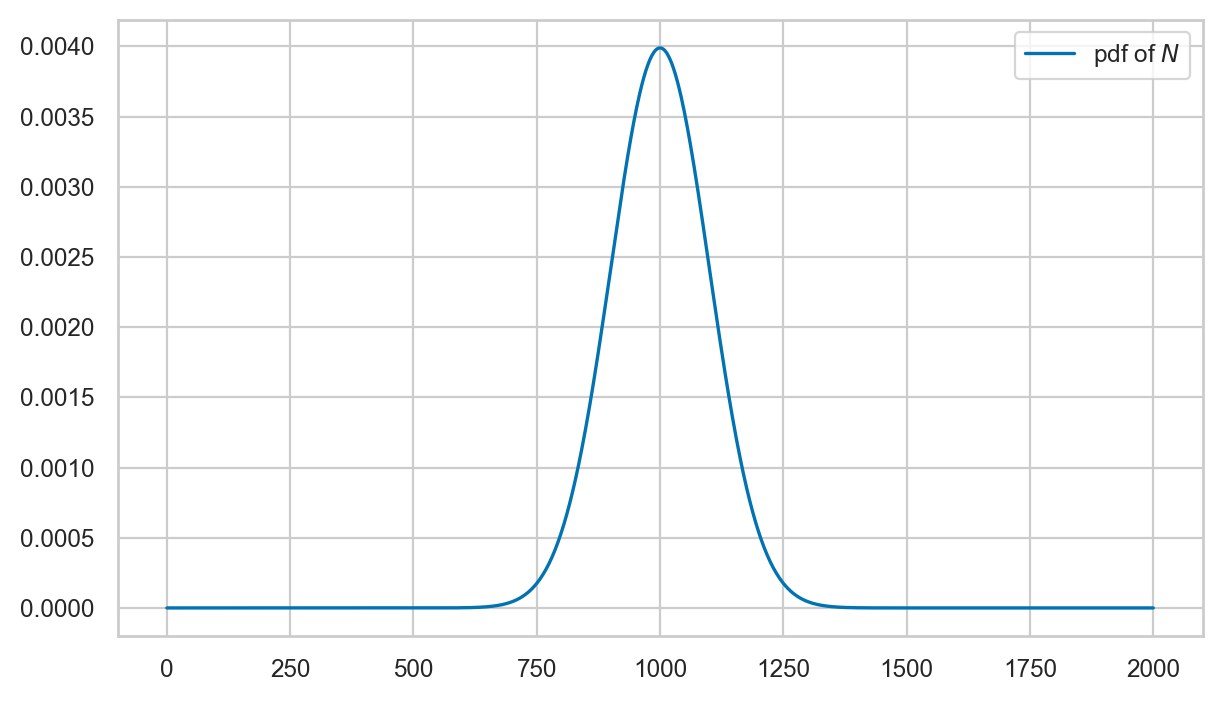

In [20]:
ns = np.linspace(0, 2000, 1000)
fNs = rvN.pdf(ns)
sns.lineplot(x=ns, y=fNs, label="pdf of $N$")

The cumulative distribution is the integral of the probability density function:

$$
   F_N(b) = \textrm{Pr}(N \leq b) = \int_{-\infty}^b f_N(n) \, dn
$$


<Axes: >

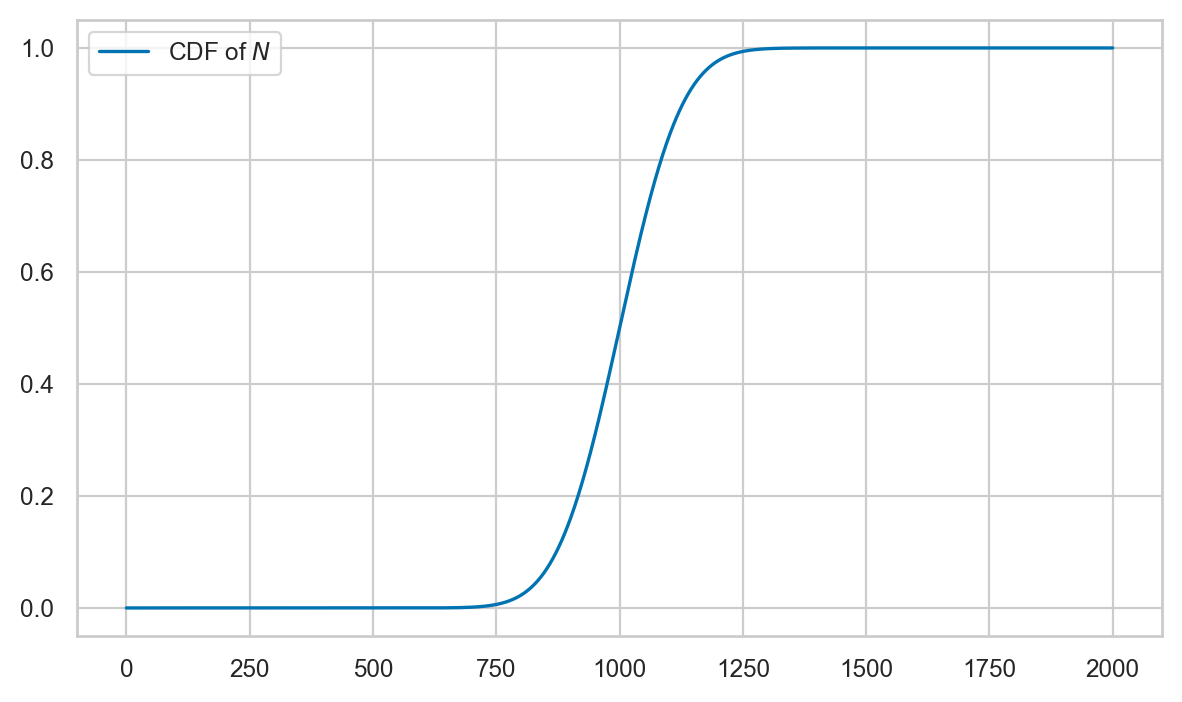

In [21]:
ns = np.linspace(0, 2000, 1000)
FNs = rvN.cdf(ns)
sns.lineplot(x=ns, y=FNs, label="CDF of $N$")

### Properties of the distribution

In [22]:
rvN.mean()

1000.0

In [23]:
rvN.std()

100.0

In [24]:
rvN.var()

10000.0

In [25]:
np.sqrt( rvN.var() )  # = rvN.std()

100.0

In [26]:
rvN.median()

1000.0

In [27]:
rvN.support()

(-inf, inf)

### Computing probabilities

Suppose you want to compute the probability of the outcome $\{ a \leq N \leq b \}$
for the random variable $N$.

In [28]:
# Pr({800 < N < 1200}) = integral of f_N between 800 and 1200
quad(rvN.pdf, 800, 1200)[0]

0.9544997361036417

In [29]:
# Pr({800 < N < 1200}) = F_N(1200) - F_N(800)
rvN.cdf(1200) - rvN.cdf(800)

0.9544997361036416

### Computing quantiles

The inverse question is to find the interval $(-\infty, n_q]$ that contains proportion $q$ of the total probability.

For example the $q=0.25$ quantile is located at

In [30]:
# first quartile
rvN.ppf(0.25)

932.5510249803918

In [31]:
# verify that Pr({N<=932.5510249803918)}) == 0.25
rvN.cdf(932.5510249803918)

0.25

In [32]:
# second quartile == median
rvN.ppf(0.5)

1000.0

In [33]:
# third quartile
rvN.ppf(0.75)

1067.4489750196083

#### Left tail

In [34]:
rvN.ppf(0.05)

835.5146373048527

#### Right tail

In [35]:
rvN.ppf(0.95)

1164.4853626951472

#### Computing confidence intervals

To compute a 90% confidence interval for the random variable $N$,
we can use the `rvN.interval()` method.

In [36]:
rvN.interval(0.90)

(835.5146373048527, 1164.4853626951472)

Note the method `rvN.interval(0.90)` is just a shortcut for computing `(rvN.ppf(0.05),rvN.ppf(0.95))`.

### Generating random observations

Let's say you want to generate $n=10$ observations from the random variable $N$.
You can do this by calling the method `rvN.rvs(n)`.

In [37]:
ns = rvN.rvs(10)
ns

array([1178.86284734, 1043.65098505, 1009.64974681,  813.65072966,
        972.26117975,  964.52410207,  991.72585185,  937.29993232,
        995.6181831 ,  952.27819696])

In [38]:
ns_mean = sum(ns) / len(ns)
ns_mean

985.9521754922469

### Computing expectations

Suppose the distributor accepts only bottles contain between 800 ml and 1200 ml,
and you'll receive a receive payment of $\$2$ for each bottle.
Bottles outside that range get rejected and you don't get paid for them.

In [39]:
def payment(n):
    if 800 <= n and n <= 1200:
        return 2
    else:
        return 0

In [40]:
# get paid if in spec
payment(1050)

2

In [41]:
# don't get paid if out of spec
payment(1250)

0

In [42]:
# expected value of payment
rvN.expect(payment, lb=0, ub=2000)

1.9089994721789976

Visually speaking, only parts of the probability mass of the random variable "count" towards the payment, the subset of the values inside the yellow region shown below.

<Axes: >

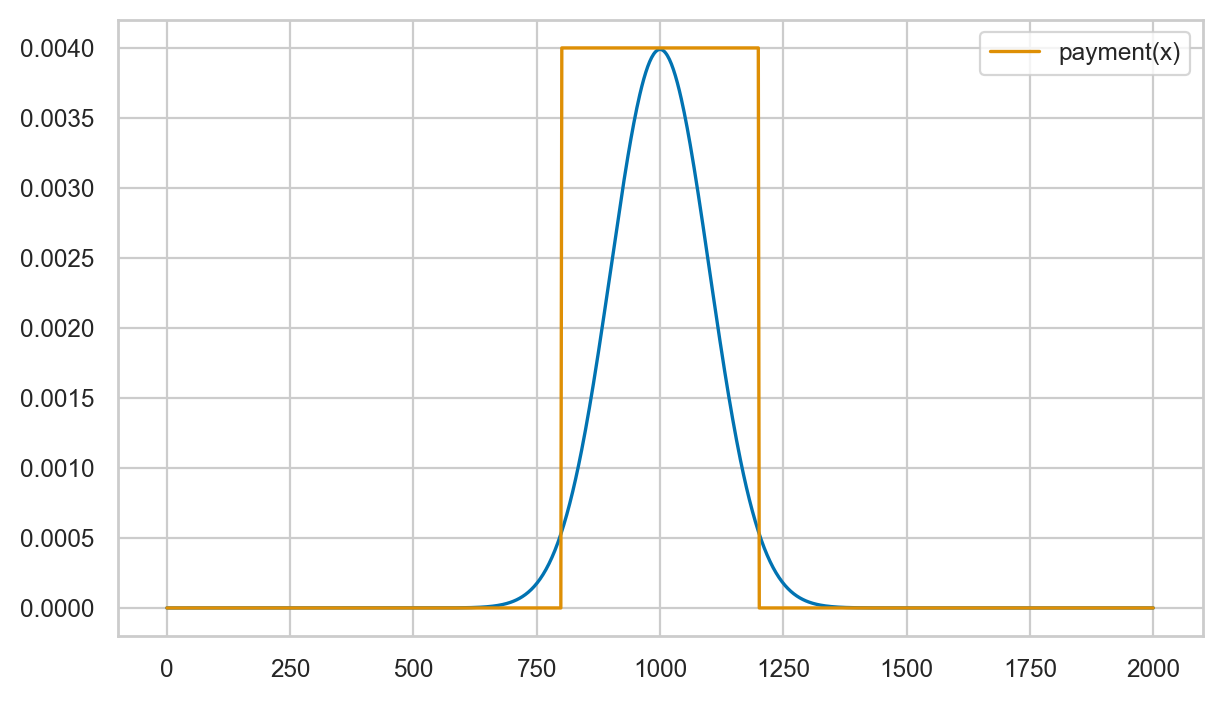

In [43]:
xs = np.linspace(0, 2000, 1000)
ys = [payment(x)/500 for x in xs]

sns.lineplot(x=xs, y=rvN.pdf(xs))
sns.lineplot(x=xs, y=ys, label="payment(x)")

## Multiple random variables

### Joint probability density functions

TODO: insert figure as attachment here.

See notebook [`../figure_generation/continuous_RVs.ipynb`](../figures_generation/continuous_RVs.ipynb) for the code to generate the figure in the book.

### Marginal density functions

TODO: insert figure as attachment here.

See notebook [`../figure_generation/continuous_RVs.ipynb`](../figures_generation/continuous_RVs.ipynb) for the code to generate the figure in the book.

### Conditional probability density functions

### Examples

#### Example 1: Multivariable uniform

In [44]:
xmin = 0
xmax = 100
ymin = 0
ymax = 10

# joint pdf of = uniform(0,100) x uniform(0,10)
def fUV(x,y):
    A = (xmax-xmin) * (ymax-ymin)
    if xmin <= x and x <= xmax and ymin <= y and y <= ymax:
        return 1/A
    else:
        return 0.0


In [45]:
from scipy.stats import uniform

rvU = uniform(0,100)
rvV = uniform(0,10)

# joint pdf of = uniform(0,100) x uniform(0,10)
def fUV(u,v):
    return rvU.pdf(u) * rvV.pdf(v)


In [46]:
fUV(70,10)

0.001

In [47]:
from scipy.integrate import dblquad

dblquad(fUV, 0, 20, 0, 300)[0]

1.0000000000000004

(0.0, 0.002)

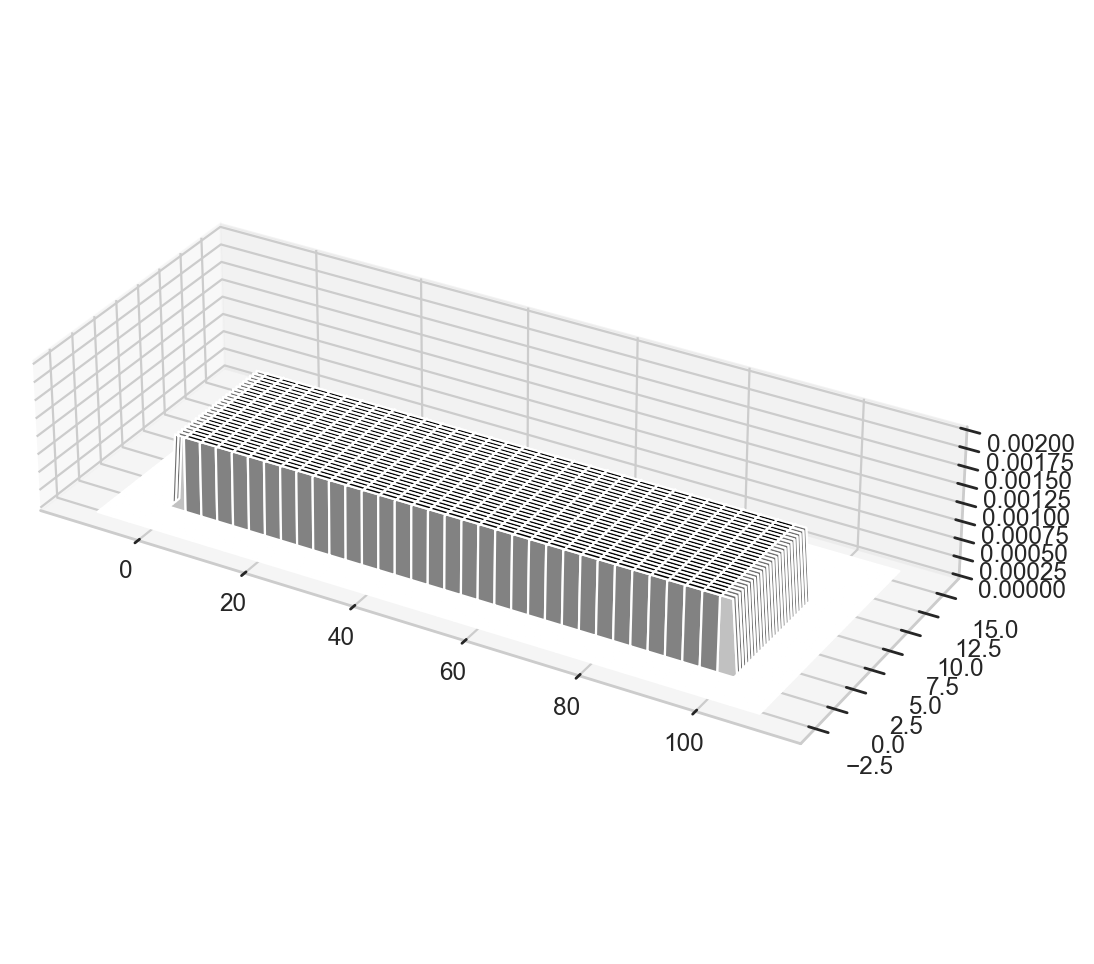

In [48]:
from mpl_toolkits.mplot3d import axes3d

fig1a = plt.figure(figsize=(12,6))
ax1a = fig1a.add_subplot(111, projection='3d')

us = np.arange(-10,110,1)
vs = np.arange(-3,16,0.1)
Us,Vs = np.meshgrid(us,vs)
fUVuv = np.vectorize(fUV)(Us,Vs)

# Plot a basic wireframe
# ax.plot_wireframe(X, Y, fUxy, rstride=10, cstride=20)
ax1a.plot_surface(Us, Vs, fUVuv, cmap="Greys")#  rstride=10, cstride=20)
ax1a.set_box_aspect((10,4,2))
ax1a.set_zlim(0,0.002)

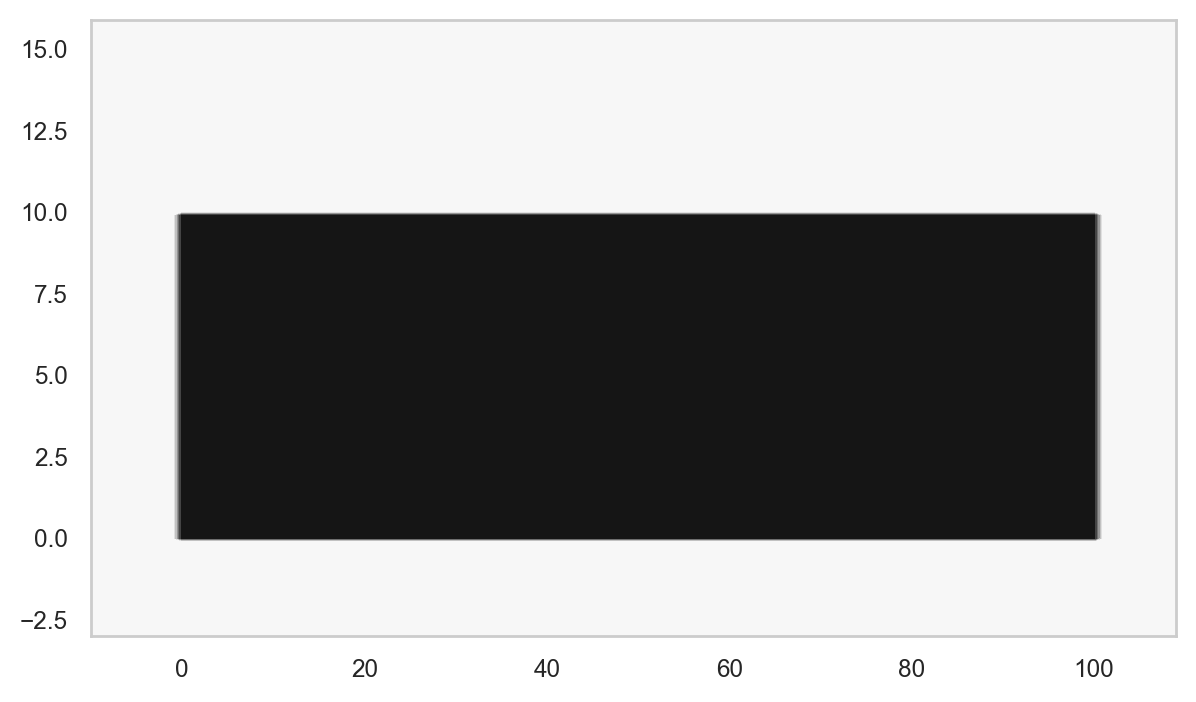

In [49]:
fig1b = plt.figure()
ax1b = fig1b.add_subplot(111)
ax1b.contourf(Us, Vs, fUVuv, cmap="Greys")

#### Example 2: Kombucha volume increasing with temperature

Consider now the joint sample space $(N,T)$,
where $T$ describes the temperature of the Kombucha that is going into the bottles,
and $N$ describes the volume that goes into each bottle.

Suppose the temperature random variable is normally distributed with standard deviation $\sigma_T = 2$
around the mean of $\mu_T = 20$,
which is written mathematically as $T \sim \mathcal{N}(20,2)$.
The variability of the volume of kombucha depends on the temperature $t$,
and is described by the random variable $N \sim \mathcal{N}(\mu_N,75)$,
where $\mu_N = 1000 + 35(t-20)$.
In other words,
the conditional distribution $f_{N|T}(n|t)$ is distributed according to:

$$
   f_{N|T} = \mathcal{N}(1000 + 35(T-20), 75).
$$

By studying the dependence between the bottling temperature and the variation in the volume,
you might be able to improve the reliability of the kombucha bottling process.
Recall that your distributor only pays for bottles that are within "spec" (mean of 1000 +/- 2 times std = $[800,1200]$).

In [50]:
from scipy.stats import norm

rvT = norm(20,2)

# joint pdf f_{NT}(n,t) = f_{N|T}(n|t) * f_T(t)
def fNT2(n,t):
    fNgivent = norm(1000+35*(t-20), 75)  # = f_{N|T=t}
    return fNgivent.pdf(n) * rvT.pdf(t)


In [51]:
ts = np.arange(15,25,0.2)
ns = np.arange(700,1300,10)
Ts, Ns = np.meshgrid(ts,ns)
fNT2nt = np.vectorize(fNT2)(Ns,Ts)

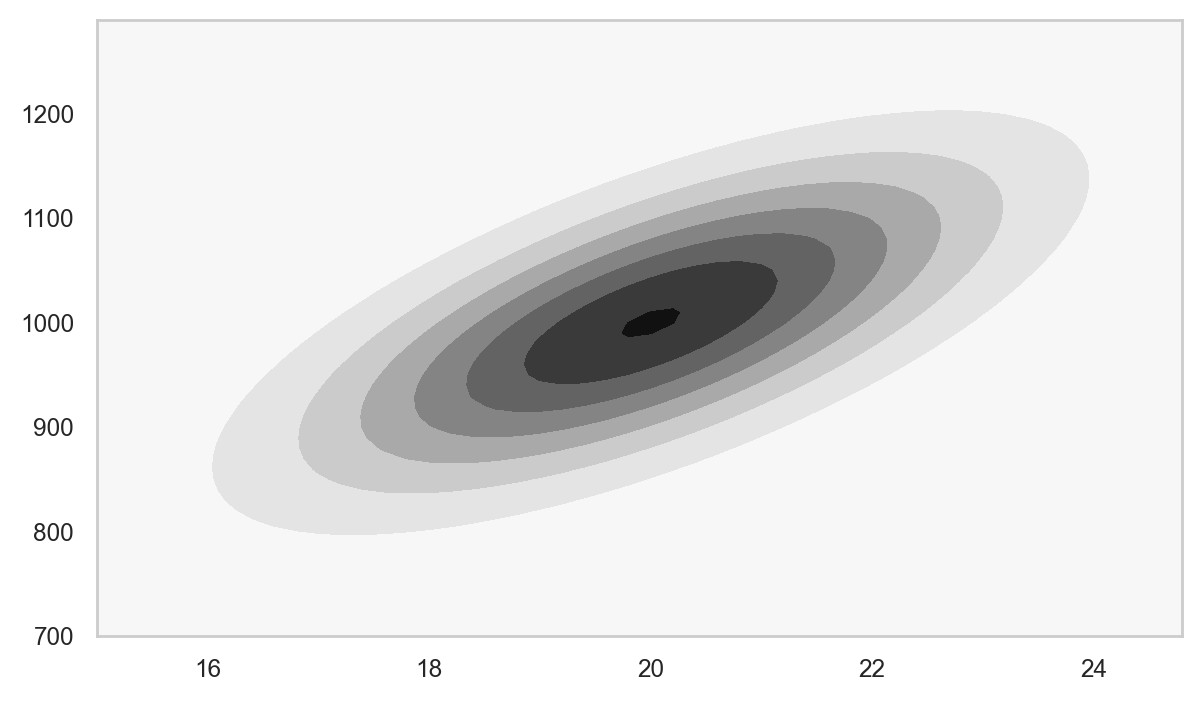

In [52]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(Ts, Ns, fNT2nt, cmap="Greys")

#### Example 3: Temperature-dependent variability

Consider now an alternative scenario in which the **variance** of the volume of kombucha $N$
varies with temperature.
The temperature random variable is $T \sim \mathcal{N}(20,2)$.
And the volume of kombucha is described by the random variable $N \sim \mathcal{N}(1000,\sigma_N)$,
where $\sigma_N = 100 + 5(t-20)$.
In other words,
the conditional distribution $f_{N|T}(n|t)$ is distributed according to:

$$
   f_{N|T} = \mathcal{N}(1000, 100 + 5(t-20)).
$$


In [53]:
from scipy.stats import norm

rvT = norm(20,2)

infos = {}
# joint pdf f_{NT}(n,t) = f_{N|T}(n|t) * f_T(t)
def fNT3(n,t):
    fNgivent = norm(1000, 100 + 14*(t-20))
    return fNgivent.pdf(n) * rvT.pdf(t)


In [54]:
ts = np.arange(15,25,0.2)
ns = np.arange(700,1300,10)
Ts, Ns = np.meshgrid(ts,ns)
fNT3nt = np.vectorize(fNT3)(Ns,Ts)

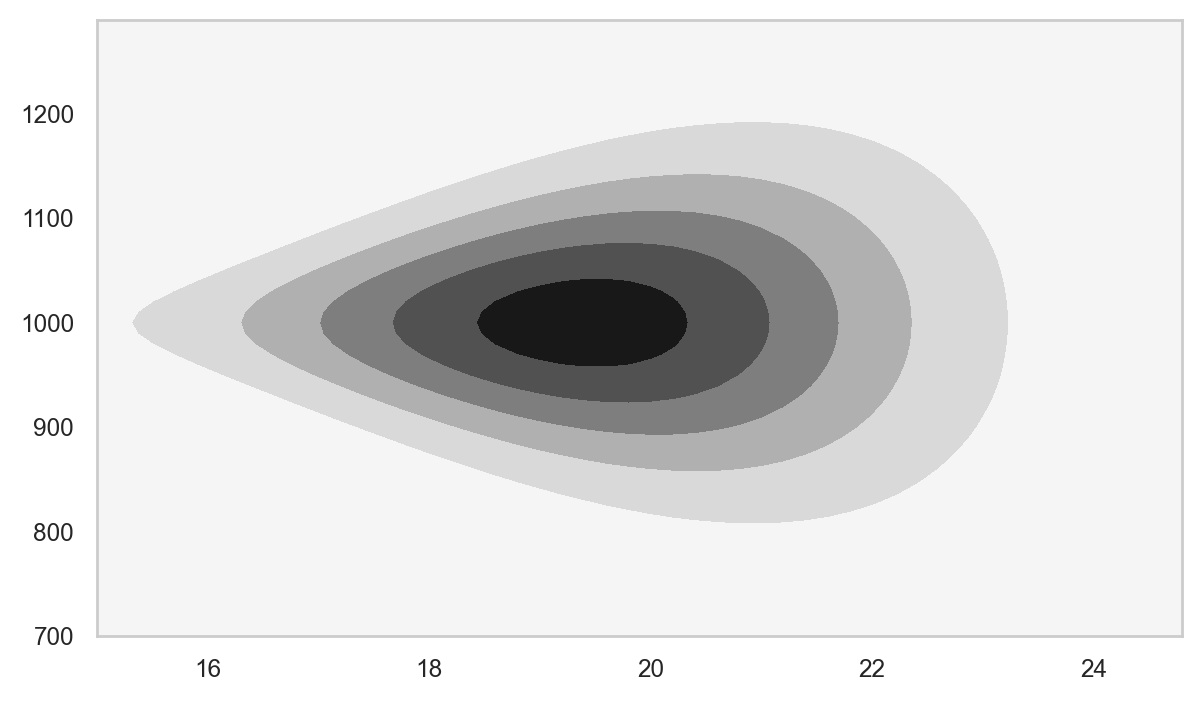

In [55]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.contourf(Ts, Ns, fNT3nt, cmap="Greys")

### Useful probability formulas

### Multivariable expectation
                                

### Independent, identically distributed random variabls

## Discussion

### Bulk of the normal distribution

How much of the total probability "weight" lies within $k$ standard deviations of the mean?

$$
\textrm{Pr}(\mu_N - k\sigma_N \leq N \leq \mu_N + k\sigma_N) \ = \ p_k.
$$

In [56]:
from scipy.integrate import quad
from scipy.stats import norm
rvN = norm(1000, 100)

In [57]:
mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable

for k in [1, 2, 3]:
    I_k = [mu - k*sigma, mu + k*sigma]
    p_k = quad(rvN.pdf, *I_k)[0]
    print(f"p_{k} = Pr( N in {I_k} ) = {p_k:.3f}")

p_1 = Pr( N in [900.0, 1100.0] ) = 0.683
p_2 = Pr( N in [800.0, 1200.0] ) = 0.954
p_3 = Pr( N in [700.0, 1300.0] ) = 0.997


The code below highlights the interval $I_k$ and computes the probability $p_k$.
Change the value of $k$ to get different plots.

0.9544997361036417

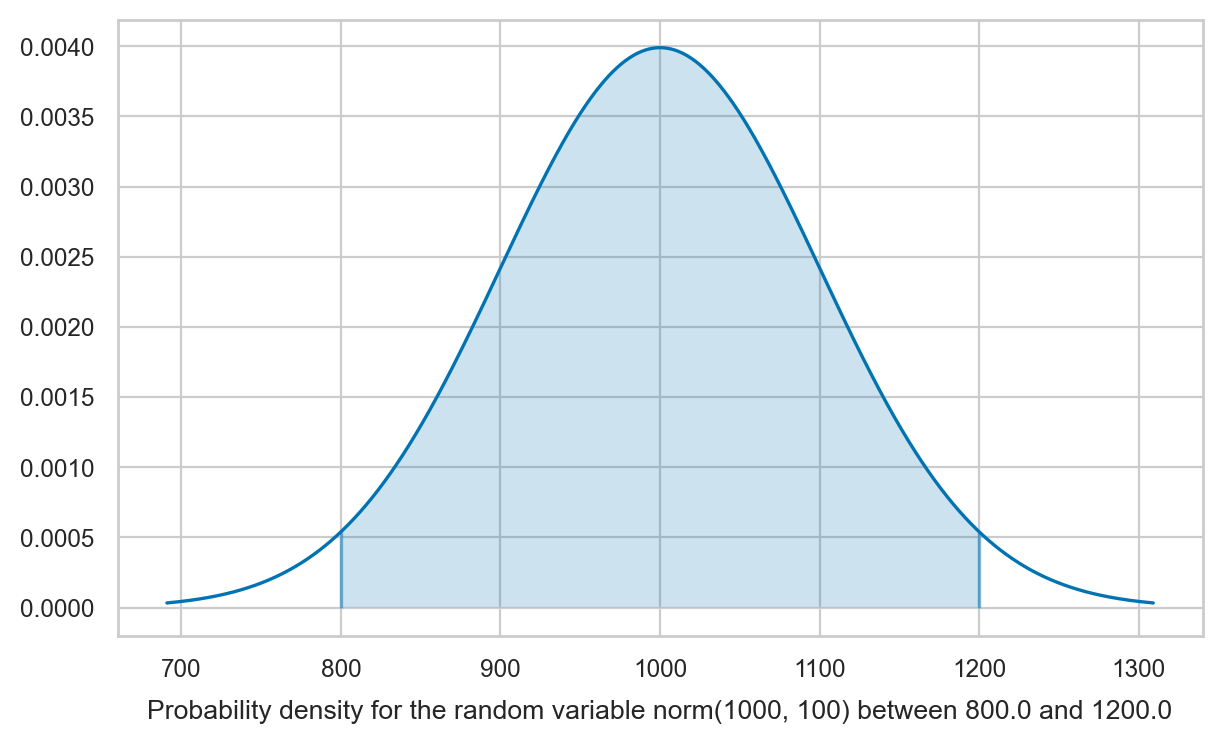

In [58]:
from ministats import calc_prob_and_plot

k = 2              # number of standard deviations around the mean

# values of x in the interval 𝜇 ± k𝜎 = [𝜇-k𝜎, 𝜇+k𝜎]
I_k = [mu-k*sigma, mu+k*sigma]
p_k, _ = calc_prob_and_plot(rvN, *I_k)
p_k

Try changing the value of the variable `k` to 1 or 3 in the above code cell.

### Tails of the normal distribution

We're often interested in tail ends of the distribution, which contain the unlikely events.

In [59]:
mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable

for k in [1, 2, 3]:
    # compute the probability in the left tail (-∞,𝜇-k𝜎]
    x_l = mu - k*sigma
    p_l = quad(rvN.pdf, rvN.ppf(0.0000000001), x_l)[0]
    # compute the probability in the right tail [𝜇+k𝜎,∞)
    x_r = mu + k*sigma
    p_r = quad(rvN.pdf, x_r, rvN.ppf(0.9999999999))[0]
    # add together to get total probability in the tails
    p_tails = p_l + p_r
    print(f"Pr( N<{x_l} or N>{x_r} ) = {p_tails:.4f}")

Pr( N<900.0 or N>1100.0 ) = 0.3173
Pr( N<800.0 or N>1200.0 ) = 0.0455
Pr( N<700.0 or N>1300.0 ) = 0.0027


The code below highlights the tails of the distribution and computes the sum of their probability.

Pr( {N<800.0} ∪ {N>1200.0} ) = 0.0455


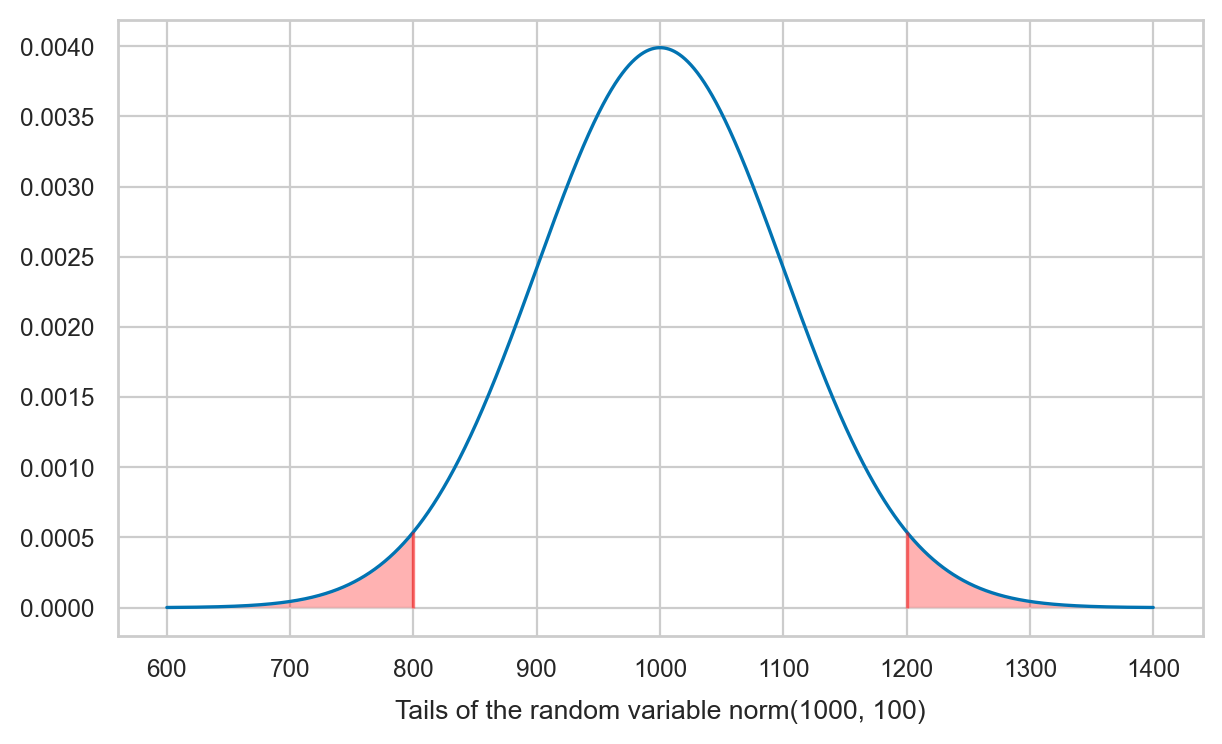

In [60]:
from ministats import calc_prob_and_plot_tails

mu = rvN.mean()    # mean of the random variable
sigma = rvN.std()  # standard deviaiton of the random variable


k = 2              # number of standard deviations around the mean

# the distribution's left tail (-∞,𝜇-k𝜎]
x_l = mu - k*sigma
# the distribution's right tail [𝜇+k𝜎,∞)
x_r = mu + k*sigma
p_tails, _ = calc_prob_and_plot_tails(rvN, x_l, x_r, xlims=[600, 1400])

print(f"Pr( {{N<{x_l}}} ∪ {{N>{x_r}}} ) = {p_tails:.4f}")

Try changing the value of the variable `k` in the above code cell.

The above calculations leads us to an important rule of thumb: the values of the 5% tail of the distribution are $k=2$ standard deviations away from the mean (more precisely, we should use $k=1.96$ to get exactly 5%). We'll use this facts later in STATS to define a *cutoff value* for events that are unlikely to occur by chance.